In [1]:
#regression prepare line destination but not speratial destinations
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras

(train_data, train_targets), (test_data, test_targets) = keras.datasets.boston_housing.load_data()

2024-11-09 20:59:31.480309: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-09 20:59:31.491439: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-09 20:59:31.502358: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-09 20:59:31.505280: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-09 20:59:31.512983: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# train_data.transpose()[0]

In [3]:
# train_data

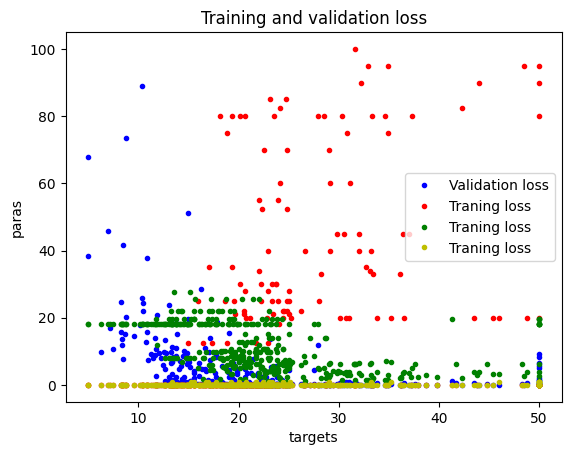

In [4]:
plt.plot(train_targets, train_data.transpose()[0], "b.", label="Validation loss")
plt.plot(train_targets, train_data.transpose()[1], "r.", label="Traning loss")
plt.plot(train_targets, train_data.transpose()[2], "g.", label="Traning loss")
plt.plot(train_targets, train_data.transpose()[3], "y.", label="Traning loss")
plt.title("Training and validation loss")
plt.xlabel("targets")
plt.ylabel("paras")
plt.legend()
plt.show()


In [5]:
test_data.shape

(102, 13)

In [6]:
train_targets.shape

(404,)

In [7]:
# train_targets[0]

In [8]:
# train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [9]:
mean = train_data.mean(axis = 0)
print(mean)
# print(mean.shape)
train_data -= mean
print("mul mean")
print(train_data)
std = train_data.std(axis = 0)
# print(std)
train_data /=std
print("mul mean/std")
print(train_data)

[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
mul mean
[[ -2.51264057 -11.48019802  -2.96443069 ...   2.5240099   42.11683168
    5.97918317]
 [ -3.72334057  71.01980198  -9.07443069 ...  -3.7759901   40.59683168
   -9.63081683]
 [  1.15310943 -11.48019802   6.99556931 ...   1.7240099   20.73683168
   -9.48081683]
 ...
 [ -3.71045057  23.51980198  -5.04443069 ...  -1.5759901    7.46683168
   -4.91081683]
 [ -1.59593057 -11.48019802   8.47556931 ...  -3.7759901  -92.83316832
    3.04918317]
 [ -3.73072057  48.51980198  -8.17443069 ...  -2.8759901   21.91683168
   -8.36081683]]
mul mean/std
[[-0.27224633 -0.48361547 -0.43576161 ...  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 ... -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  ...  0.78447637  0.22061726
  -1.30850006]
 ...
 [

In [10]:
print(test_data)
print("mean", mean)
test_data -= mean
test_data /= std
test_data


[[1.80846e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 2.72500e+01
  2.90500e+01]
 [1.23290e-01 0.00000e+00 1.00100e+01 ... 1.78000e+01 3.94950e+02
  1.62100e+01]
 [5.49700e-02 0.00000e+00 5.19000e+00 ... 2.02000e+01 3.96900e+02
  9.74000e+00]
 ...
 [1.83377e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 3.89610e+02
  1.92000e+00]
 [3.58090e-01 0.00000e+00 6.20000e+00 ... 1.74000e+01 3.91700e+02
  9.71000e+00]
 [2.92400e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.40160e+02
  9.81000e+00]]
mean [3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]


array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

In [11]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1)
    ])
    model.compile(
        optimizer="rmsprop",
        loss = "mse", #均方误差（mean squared error，MSE）​，预测值与目标值之差的平方。这是回归问题常用的损失函数。
        metrics=["mae"] #平均绝对误差（mean absolute error，MAE）​。它是预测值与目标值之差的绝对值。如果这个问题的MAE等于0.5，就表示预测房价与实际价格平均相差500美元。
    )
    return model
    

In [12]:
k = 4
num_val_sample = len(train_data)//4
num_val_sample

101

In [13]:
tf_callback =  tf.keras.callbacks.TensorBoard(log_dir="./logs_boston")
# early_stop_callback= tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.002,patience=0,mode='auto',restore_best_weights=False)

In [14]:
num_epochs = 500
all_scores = []
all_mae_histories =[]
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_sample:(i+1)*num_val_sample]
    val_targets = train_targets[i *num_val_sample:(i+1)*num_val_sample]
    partial_train_data = np.concatenate([
        train_data[:i * num_val_sample], 
        train_data[(i+1)* num_val_sample:]], axis = 0)
    partial_train_targets = np.concatenate([
        train_targets[:i*num_val_sample], 
        train_targets[(i+1)*num_val_sample:]], axis = 0)
    
    model = build_model()
    # historys =model.fit(partial_train_data, partial_train_targets, epochs= num_epochs, batch_size = 16, verbose = 0, 
    #                     callbacks=[tf_callback])
    historys =model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets), epochs= num_epochs, batch_size = 16, verbose = 0, 
                    callbacks=[tf_callback])
    mae_history = historys.history["val_mae"]
    all_mae_histories.append(mae_history)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mse)

print(all_scores)
# print(all_mae_histories)

Processing fold #0


I0000 00:00:1731157174.376957  138749 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731157174.480097  138749 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731157174.480141  138749 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731157174.483072  138749 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731157174.483110  138749 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Processing fold #1
Processing fold #2
Processing fold #3
[10.434510231018066, 18.224523544311523, 15.353538513183594, 15.07189655303955]


In [15]:
np.mean(all_scores)

14.771117210388184

In [16]:
np.mean(all_mae_histories)
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
# print(average_mae_history)

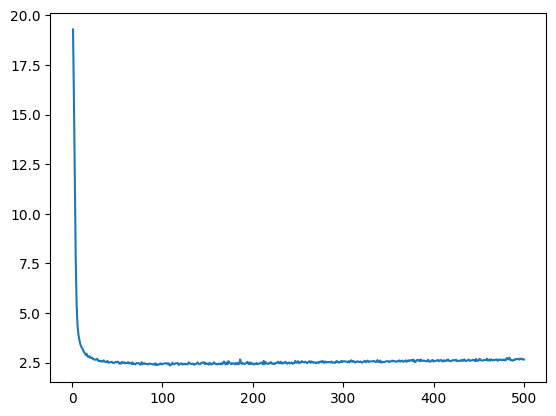

In [17]:
plt.plot(range(1, len(average_mae_history) +1),average_mae_history)
plt.show()

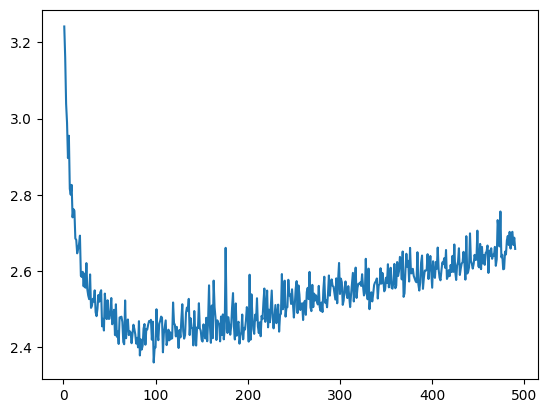

In [18]:
plt.plot(range(1, len(average_mae_history[10:]) +1),average_mae_history[10:])
plt.show()

In [19]:
model=build_model()
model.fit(train_data, train_targets, epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - loss: 11.3804 - mae: 2.3769


2.5121357440948486

In [20]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([6.7969856], dtype=float32)

In [21]:
test_targets[0]

7.2